# **TUGAS AKHIR**
Pada penelitian ini akan dilakukan pencarian model yang mampu mendeteksi 2 kelas diabetes retinopati (No DR dan Proliferative DR)

## Data6

Dataset : C:/Dani/Kuliah/TA/data6

Link Dataset :
[Diabetes Retinopati](https://www.kaggle.com/datasets/pkdarabi/diagnosis-of-diabetic-retinopathy)

### Import Lib

In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
import glob, os

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten, Dropout, BatchNormalization, Activation, Add, GlobalAveragePooling2D
from keras.models import Model
from keras.activations import relu
from keras.backend import softmax, sigmoid
from keras.optimizers import Adam
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import f_oneway

### Image Data Generator

In [2]:
train_path = 'C:/Dani/Kuliah/TA/data6/train'
valid_path = 'C:/Dani/Kuliah/TA/data6/valid'
test_path = 'C:/Dani/Kuliah/TA/data6/test'

In [3]:
image_size = (224,224)
batch_size = 16
class4 = ['No_DR', 'DR']

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    preprocessing_function=None
)

# no dr - proliferative
print("\nNo DR - DR")
print("Train : ")
train_generator_nodr_prodr = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)

print("Validation : ")
valid_generator_nodr_prodr = datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)

print("Test : ")
test_generator_nodr_prodr = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)


No DR - DR
Train : 
Found 2076 images belonging to 2 classes.
Validation : 
Found 231 images belonging to 2 classes.


Test : 
Found 531 images belonging to 2 classes.


### Development Phase : VGG19

In [4]:
input_shape = train_generator_nodr_prodr.image_shape

lr = 0.0001
steps_per_epoch = 40
epochs = 20
validation_steps = 30

In [5]:
def show_accuracy(history, model, reg):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model + ' ' + reg + ' Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def show_loss(history, model, reg):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model + ' ' + reg + ' Loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

#### MODEL

In [9]:
def Model_CNN (input_shape) :
    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (64,64,1)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    x = Conv2D(128, (3,3), padding="same", activation=relu, name="block2_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block2_maxpool")(x)

    x = Conv2D(256, (3,3), padding="same", activation=relu, name="block3_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block3_maxpool")(x)

    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block4_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block4_pool")(x)

    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block5_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block5_pool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)

    #CLASSIFICATION - Fully Connected Layers
    x = Dense(4096, activation=relu, name="fc1")(x) #1
    x = Dense(4096, activation=relu, name="fc2")(x) #2
    x = Dense(1, activation=sigmoid, name="predictions")(x) #3
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "IDK_Model")

    return model

#### Compile & Train Model

In [10]:
model_VGG = Model_CNN(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [11]:
history_VGG_nodr_prodr_data6 = model_VGG.fit(
      train_generator_nodr_prodr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_prodr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/20
40/40 [==============================] - 292s 7s/step - loss: 0.4599 - accuracy: 0.7421 - val_loss: 0.3197 - val_accuracy: 0.8528
Epoch 2/20
40/40 [==============================] - 257s 6s/step - loss: 0.2333 - accuracy: 0.8978
Epoch 3/20
40/40 [==============================] - 239s 6s/step - loss: 0.2025 - accuracy: 0.9156
Epoch 4/20
40/40 [==============================] - 207s 5s/step - loss: 0.2510 - accuracy: 0.9266
Epoch 5/20
40/40 [==============================] - 203s 5s/step - loss: 0.2032 - accuracy: 0.9297
Epoch 6/20
40/40 [==============================] - 201s 5s/step - loss: 0.1767 - accuracy: 0.9422
Epoch 7/20
40/40 [==============================] - 197s 5s/step - loss: 0.2135 - accuracy: 0.9359
Epoch 8/20
40/40 [==============================] - 200s 5s/step - loss: 0.2024 - accuracy: 0.9375
Epoch 9/20
40/40 [==============================] - 211s 5s/step - loss: 0.1815 - accuracy: 0.9328
Epoch 10/20
40/40 [==============================] - 214s 5s/step -

#### Save Model

In [12]:
history_VGG_nodr_prodr_data6.model.save("VGG19_nodr_prodr_data6_try3.h5")

C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Evaluate

In [13]:
# loaded_vgg16 = load_model('VGG16.h5')

VGG16_loss, VGG16_accuracy = history_VGG_nodr_prodr_data6.model.evaluate(train_generator_nodr_prodr, steps=50)
print("Model train loss : ", VGG16_loss)
print("Model train accuracy : ", VGG16_accuracy)

50/50 [==============================] - 52s 1s/step - loss: 0.1367 - accuracy: 0.9575
Model train loss :  0.13671685755252838
Model train accuracy :  0.9574999809265137


In [14]:
VGG16_loss, VGG16_accuracy = history_VGG_nodr_prodr_data6.model.evaluate(test_generator_nodr_prodr, steps=50)
print("Model test loss : ", VGG16_loss)
print("Model test accuracy : ", VGG16_accuracy)

50/50 [==============================] - 37s 721ms/step - loss: 0.1590 - accuracy: 0.9454
Model test loss :  0.15903358161449432
Model test accuracy :  0.9453860521316528


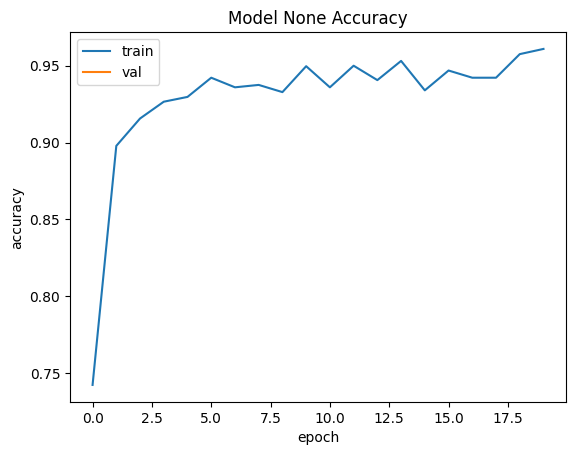

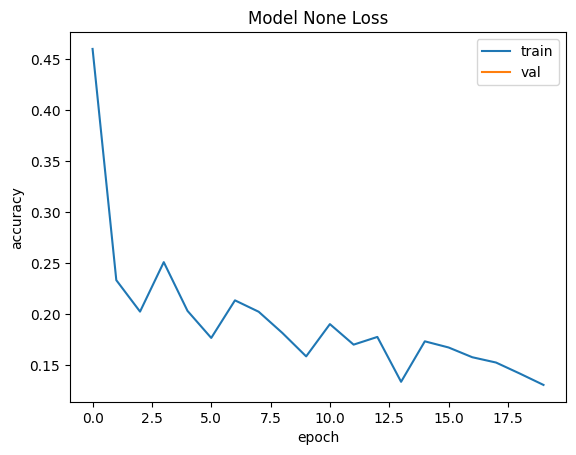

In [15]:
show_accuracy(history_VGG_nodr_prodr_data6, 'Model', 'None')
show_loss(history_VGG_nodr_prodr_data6, 'Model', 'None')

#### Prediction

In [16]:
y_pred = history_VGG_nodr_prodr_data6.model.predict(test_generator_nodr_prodr)

34/34 [==============================] - 37s 1s/step


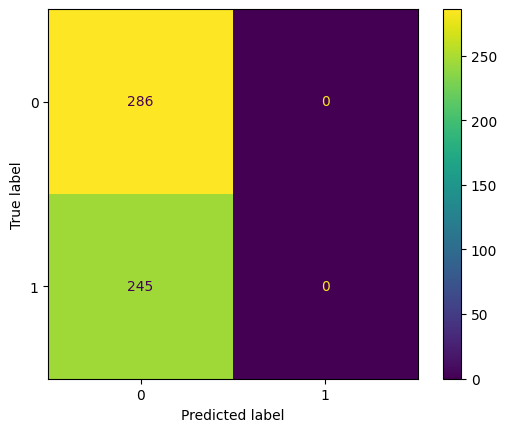

In [17]:
y_pred_class = np.argmax(y_pred, axis=1)
y_true = test_generator_nodr_prodr.classes

cm = confusion_matrix(y_true, y_pred_class)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()
plt.show()

### Pemanggilan Model

In [1]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

image_size = (224, 224) # Bisa kalian ganti#define input shape
labels = ['No DR', 'Proliferative DR']

In [3]:
MODEL_PATH = 'C:\Dani\Kuliah\TA\VGG19_nodr_prodr_data6_try3.h5'

model = load_model(MODEL_PATH, compile=False)

In [4]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    return nimg
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

#### Uji 1 DR - No: 14 DR: 99

In [5]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 1s/step
No DR:  14
DR:  99


#### Uji 2 No - No: 107 DR: 11

In [6]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 176ms/step
No DR:  107
DR:  11


#### Uji 3 DR - No: 116 DR: 84

In [7]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 142ms/step
No DR:  116
DR:  84


#### Uji 4 DR - No: 129 DR: 71

In [8]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/test/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 198ms/step
No DR:  129
DR:  71


#### Uji 5 No - No: 136 DR: 64

In [9]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 146ms/step
No DR:  136
DR:  64


#### Uji 6 No - No: 136 DR: 64

In [10]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/test/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 177ms/step
No DR:  136
DR:  64


#### Uji 7 No - No: 175 DR: 25

In [27]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/test/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    print(label[35:-4], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 272ms/step
01d9477b1171_png.rf.106ae9ee6cefce0575b1234ae9e33e3e  -  Proliferative DR  -  1.0
1/1 [==============================] - 0s 220ms/step
01f7bb8be950_png.rf.f00e239651c17fdd19e79e43f923767c  -  No DR  -  0.0
1/1 [==============================] - 0s 193ms/step
0212dd31f623_png.rf.028a049dec0104cc7507e305b3350ef1  -  No DR  -  0.0
1/1 [==============================] - 0s 244ms/step
02358b47ea89_png.rf.f2c9e8e7f05075be774dfaebd5b84e20  -  No DR  -  0.0
1/1 [==============================] - 0s 210ms/step
04aef84a2cc1_png.rf.8277e09e3432478ed982f918812b8468  -  No DR  -  0.0
1/1 [==============================] - 0s 208ms/step
054b1b305160_png.rf.6fb82a9515a2cefbb1dc7d754f5efc79  -  No DR  -  0.0
1/1 [==============================] - 0s 217ms/step
060e00d1e2ab_png.rf.7d0ddd2e457230c6d7cc877ee35875f5  -  No DR  -  0.0
1/1 [==============================] - 0s 241ms/step
0773a1c326ad_png.rf.06aeab157f536f1d5181a05301d1385f  -  No DR  -  0

# PENGARUH BESARAN MAX POLING ATAUPUN DENSE

## Library

In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
import glob, os

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten, Dropout, BatchNormalization, Activation, Add, GlobalAveragePooling2D
from keras.models import Model
from keras.activations import relu
from keras.backend import softmax, sigmoid
from keras.optimizers import Adam
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import f_oneway

## Dataset

In [2]:
train_path = 'C:/Dani/Kuliah/TA/data6/train'
valid_path = 'C:/Dani/Kuliah/TA/data6/valid'
test_path = 'C:/Dani/Kuliah/TA/data6/test'

In [3]:
image_size = (224,224)
batch_size = 16
class4 = ['No_DR', 'DR']

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    preprocessing_function=None
)

# no dr - proliferative
print("\nNo DR - DR")
print("Train : ")
train_generator_nodr_prodr = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)

print("Validation : ")
valid_generator_nodr_prodr = datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)

print("Test : ")
test_generator_nodr_prodr = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class4,
    # color_mode='grayscale',
    shuffle=True
)


No DR - DR
Train : 
Found 2076 images belonging to 2 classes.


Validation : 
Found 231 images belonging to 2 classes.
Test : 
Found 531 images belonging to 2 classes.


## Modeling

In [4]:
input_shape = train_generator_nodr_prodr.image_shape

lr = 0.0001
steps_per_epoch = 40
epochs = 20
validation_steps = 30

In [5]:
def show_accuracy(history, model, reg):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model + ' ' + reg + ' Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def show_loss(history, model, reg):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model + ' ' + reg + ' Loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

### 1 Conv2D, 1 Max, 3 Dense

In [35]:
def Model_try1 (input_shape) :
    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (64,64,1)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "IDK_Model")

    return model

In [36]:
model_VGG = Model_try1(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [37]:
try_model1 = model_VGG.fit(
      train_generator_nodr_prodr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_prodr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/20
40/40 [==============================] - 37s 881ms/step - loss: 4.4952 - accuracy: 0.0000e+00 - val_loss: 3.8622 - val_accuracy: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 34s 850ms/step - loss: 3.5251 - accuracy: 0.0000e+00
Epoch 3/20
40/40 [==============================] - 32s 788ms/step - loss: 2.8641 - accuracy: 0.0000e+00
Epoch 4/20
40/40 [==============================] - 32s 793ms/step - loss: 2.2371 - accuracy: 0.0000e+00
Epoch 5/20
40/40 [==============================] - 31s 779ms/step - loss: 1.9486 - accuracy: 0.0000e+00
Epoch 6/20
40/40 [==============================] - 32s 791ms/step - loss: 1.6236 - accuracy: 0.0000e+00
Epoch 7/20
40/40 [==============================] - 32s 790ms/step - loss: 1.4673 - accuracy: 0.0000e+00
Epoch 8/20
40/40 [==============================] - 31s 781ms/step - loss: 1.4623 - accuracy: 0.0000e+00
Epoch 9/20
40/40 [==============================] - 32s 789ms/step - loss: 1.4289 - accuracy: 0.0000e+00
Epoch 10/

In [38]:
try_model1.model.save("Try_Model_1.h5")

C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 1 Conv2D, 1 Max, 1 Dense Relu

In [39]:
def Model_try2 (input_shape) :
    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (64,64,1)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)

    #CLASSIFICATION - Fully Connected Layers
    x = Dense(512, activation=relu, name="fc1")(x) #1
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "IDK_Model")

    return model

In [40]:
model_VGG = Model_try2(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [41]:
try_model2 = model_VGG.fit(
      train_generator_nodr_prodr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_prodr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/20
40/40 [==============================] - 249s 6s/step - loss: 7.4650 - accuracy: 0.0000e+00 - val_loss: 7.6865 - val_accuracy: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 233s 6s/step - loss: 7.5960 - accuracy: 0.0000e+00
Epoch 3/20
40/40 [==============================] - 194s 5s/step - loss: 7.5031 - accuracy: 0.0000e+00
Epoch 4/20
40/40 [==============================] - 229s 6s/step - loss: 7.6103 - accuracy: 0.0000e+00
Epoch 5/20
40/40 [==============================] - 231s 6s/step - loss: 7.6102 - accuracy: 0.0000e+00
Epoch 6/20
40/40 [==============================] - 235s 6s/step - loss: 7.5780 - accuracy: 0.0000e+00
Epoch 7/20
40/40 [==============================] - 246s 6s/step - loss: 7.4548 - accuracy: 0.0000e+00
Epoch 8/20
40/40 [==============================] - 239s 6s/step - loss: 7.5658 - accuracy: 0.0000e+00
Epoch 9/20
40/40 [==============================] - 283s 7s/step - loss: 7.9391 - accuracy: 0.0000e+00
Epoch 10/20
31/40 [========

ResourceExhaustedError: Graph execution error:

Detected at node Adam/sub_10 defined at (most recent call last):
  File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Cintya Aprilia Dewi\AppData\Local\Temp\ipykernel_27744\3424544078.py", line 1, in <module>

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1130, in train_step

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 1223, in apply_gradients

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 1253, in _internal_apply_gradients

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 1342, in apply_grad_to_update_var

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\optimizer.py", line 241, in _update_step

  File "C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\adam.py", line 198, in update_step

OOM when allocating tensor with shape[802816,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Adam/sub_10}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_85537]

In [ ]:
try_model2.model.save("Try_Model_2.h5")

### 1 Conv2D, 1 Max, 1 Dense Sigmo

In [42]:
def Model_try3 (input_shape) :
    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (64,64,1)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)

    #CLASSIFICATION - Fully Connected Layers
    x = Dense(1, activation=sigmoid, name="predictions")(x) #3
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "IDK_Model")

    return model

In [43]:
model_VGG = Model_try3(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [44]:
try_model3 = model_VGG.fit(
      train_generator_nodr_prodr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_prodr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/20
40/40 [==============================] - 53s 1s/step - loss: 0.4629 - accuracy: 0.7672 - val_loss: 0.2880 - val_accuracy: 0.8658
Epoch 2/20
40/40 [==============================] - 48s 1s/step - loss: 0.2922 - accuracy: 0.8609
Epoch 3/20
40/40 [==============================] - 48s 1s/step - loss: 0.2769 - accuracy: 0.8978
Epoch 4/20
40/40 [==============================] - 53s 1s/step - loss: 0.2223 - accuracy: 0.9156
Epoch 5/20
40/40 [==============================] - 56s 1s/step - loss: 0.1959 - accuracy: 0.9469
Epoch 6/20
40/40 [==============================] - 43s 1s/step - loss: 0.1976 - accuracy: 0.9371
Epoch 7/20
40/40 [==============================] - 45s 1s/step - loss: 0.1937 - accuracy: 0.9261
Epoch 8/20
40/40 [==============================] - 58s 1s/step - loss: 0.1989 - accuracy: 0.9219
Epoch 9/20
40/40 [==============================] - 57s 1s/step - loss: 0.1258 - accuracy: 0.9531
Epoch 10/20
40/40 [==============================] - 60s 1s/step - loss: 0.1

In [45]:
try_model3.model.save("Try_Model_3.h5")

### Half Full Model VGG

In [6]:
def Model_try4 (input_shape) :
    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (64,64,1)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    x = Conv2D(128, (3,3), padding="same", activation=relu, name="block2_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block2_maxpool")(x)

    x = Conv2D(256, (3,3), padding="same", activation=relu, name="block3_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block3_maxpool")(x)

    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block4_conv1")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block4_pool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)

    #CLASSIFICATION - Fully Connected Layers
    x = Dense(1, activation=sigmoid, name="predictions")(x) #3
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "IDK_Model")

    return model

In [7]:
model_VGG = Model_try4(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [8]:
try_model4 = model_VGG.fit(
      train_generator_nodr_prodr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_prodr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/20
40/40 [==============================] - 303s 7s/step - loss: 0.4994 - accuracy: 0.7781 - val_loss: 0.3557 - val_accuracy: 0.8615
Epoch 2/20
40/40 [==============================] - 263s 7s/step - loss: 0.2937 - accuracy: 0.8852
Epoch 3/20
40/40 [==============================] - 254s 6s/step - loss: 0.2911 - accuracy: 0.8664
Epoch 4/20
40/40 [==============================] - 284s 7s/step - loss: 0.2582 - accuracy: 0.8922
Epoch 5/20
40/40 [==============================] - 288s 7s/step - loss: 0.2474 - accuracy: 0.9088
Epoch 6/20
40/40 [==============================] - 276s 7s/step - loss: 0.2354 - accuracy: 0.9167
Epoch 7/20
40/40 [==============================] - 255s 6s/step - loss: 0.2100 - accuracy: 0.9104
Epoch 8/20
40/40 [==============================] - 248s 6s/step - loss: 0.2030 - accuracy: 0.9198
Epoch 9/20
40/40 [==============================] - 267s 7s/step - loss: 0.2294 - accuracy: 0.9151
Epoch 10/20
40/40 [==============================] - 265s 7s/step -

In [9]:
try_model4.model.save("Try_Model_4.h5")

C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# loaded_vgg16 = load_model('VGG16.h5')

VGG16_loss, VGG16_accuracy = try_model4.model.evaluate(train_generator_nodr_prodr, steps=50)
print("Model train loss : ", VGG16_loss)
print("Model train accuracy : ", VGG16_accuracy)

50/50 [==============================] - 76s 2s/step - loss: 0.1511 - accuracy: 0.9488
Model train loss :  0.15110823512077332
Model train accuracy :  0.9487500190734863


In [11]:
VGG16_loss, VGG16_accuracy = try_model4.model.evaluate(test_generator_nodr_prodr, steps=50)
print("VGG19 train loss : ", VGG16_loss)
print("VGG19 train accuracy : ", VGG16_accuracy)

50/50 [==============================] - 51s 1s/step - loss: 0.1771 - accuracy: 0.9397
VGG19 train loss :  0.1771019697189331
VGG19 train accuracy :  0.9397363662719727


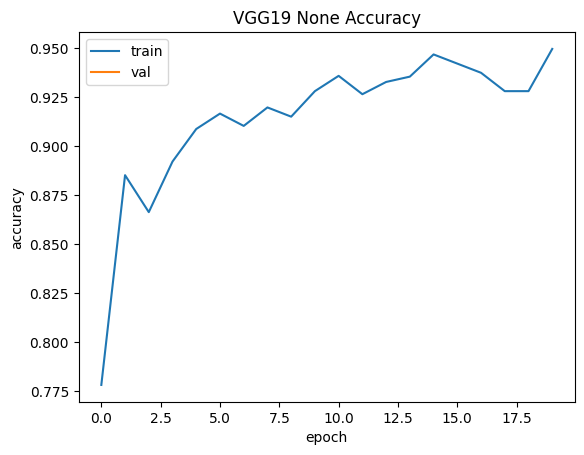

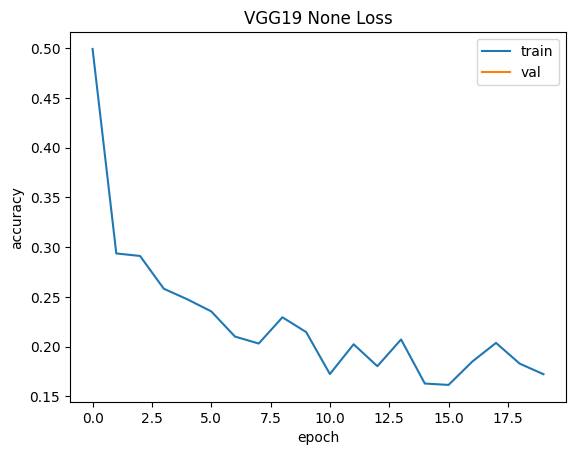

In [12]:
show_accuracy(try_model4, 'VGG19', 'None')
show_loss(try_model4, 'VGG19', 'None')

In [13]:
y_pred = try_model4.model.predict(test_generator_nodr_prodr)

34/34 [==============================] - 54s 2s/step


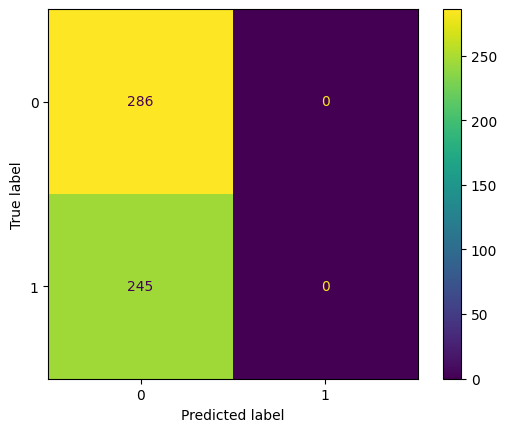

In [14]:
y_pred_class = np.argmax(y_pred, axis=1)
y_true = test_generator_nodr_prodr.classes

cm = confusion_matrix(y_true, y_pred_class)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()
plt.show()

#### Try

In [11]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

image_size = (224, 224) # Bisa kalian ganti#define input shape
labels = ['No DR', 'Proliferative DR']

In [12]:
MODEL_PATH = 'C:\Dani\Kuliah\TA\Try_Model_4.h5'

model = load_model(MODEL_PATH, compile=False)

In [13]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    return nimg
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

##### Uji 1 DR - No: 14 DR: 99

In [18]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 144ms/step
No DR:  14
DR:  99


##### Uji 2 No - No: 109 DR: 9

In [19]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 266ms/step
No DR:  109
DR:  9


##### Uji 3 DR - No: 133 DR: 67

In [14]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 199ms/step
No DR:  133
DR:  67


##### Uji 4 DR - No: 158 DR: 42

In [15]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/test/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 464ms/step
No DR:  158
DR:  42


##### Uji 5 No - No: 180 DR: 20

In [16]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 200ms/step
No DR:  180
DR:  20


##### Uji 6 No - No: 180 DR: 20

In [17]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/test/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 323ms/step
No DR:  180
DR:  20


##### Uji 7 No - No: 186 DR: 14

In [24]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/test/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    print(label[35:-4], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 262ms/step
01d9477b1171_png.rf.106ae9ee6cefce0575b1234ae9e33e3e  -  No DR  -  0.0
1/1 [==============================] - 0s 337ms/step
01f7bb8be950_png.rf.f00e239651c17fdd19e79e43f923767c  -  No DR  -  0.0
1/1 [==============================] - 0s 198ms/step
0212dd31f623_png.rf.028a049dec0104cc7507e305b3350ef1  -  No DR  -  0.0
1/1 [==============================] - 0s 157ms/step
02358b47ea89_png.rf.f2c9e8e7f05075be774dfaebd5b84e20  -  No DR  -  0.0
1/1 [==============================] - 0s 162ms/step
04aef84a2cc1_png.rf.8277e09e3432478ed982f918812b8468  -  No DR  -  0.0
1/1 [==============================] - 0s 262ms/step
054b1b305160_png.rf.6fb82a9515a2cefbb1dc7d754f5efc79  -  No DR  -  0.0
1/1 [==============================] - 0s 184ms/step
060e00d1e2ab_png.rf.7d0ddd2e457230c6d7cc877ee35875f5  -  No DR  -  0.0
1/1 [==============================] - 0s 177ms/step
0773a1c326ad_png.rf.06aeab157f536f1d5181a05301d1385f  -  No DR  -  0.0
1/1 [===

# Fixasi Yang dipakai Try_Model_4.h5 atau Model_fix.ftlite

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow import lite


model = load_model('C:/Dani/Kuliah/TA/Try_Model_4.h5')

converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("Model_fix.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\CINTYA~1\AppData\Local\Temp\tmpbya9uyvj\assets


INFO:tensorflow:Assets written to: C:\Users\CINTYA~1\AppData\Local\Temp\tmpbya9uyvj\assets


6609728